## Exercise 1 (Crawling exercise)

In this exercise a web crawler for Wikipedia was developed. 
From the term "Universidad Carlos III de Madrid" in Wikipedia implemented function extracts the following information: 


- Number of references to “Universidad Carlos III de Madrid” in Wikipedia
- Number of students extracted from Wikipedia.


In [128]:
#import of the needed libraries
import requests
from bs4 import BeautifulSoup

To solve this exercise, a function was implemented. This function returns the desired outputs (Number of references to “Universidad Carlos III de Madrid” and number of students extracted from Wikipedia). To see how the data from the web page was selected, see the README file

In [129]:
#definition for the function for building a web crawler
def web(page,WebUrl):
     if page>0:
          url = WebUrl
          code = requests.get(url)
          plain = code.text
          s = BeautifulSoup(plain, "html.parser")
            #first for loop to access the number of references
          for link in s.findAll('div', {'class':'reflist reflist-columns references-column-width reflist-columns-2'}):
               lista = link.findAll('li')
                #print for the number of references
               print(len(lista))
            #second foor loop to access the number of students
          for table in s.findAll('table', {'class':'infobox vcard'}):
              table_body = table.find('tbody')
              rows = table_body.find_all('tr')
                #print for the number of students
          print(s.find(string="Students").find_next('td').contents[0])

In [130]:
#function call
web(1,'https://en.wikipedia.org/wiki/Universidad_Carlos_III_de_Madrid')

19
18,676 (2012/13)


Calling the function, the expected results are displayed. 19 is the number of references and 18,676 is the number of students ( relatively to the academica year 2012/13

### Exercise 2 (Prediction exercise):


The goal of this exercise is to define a model to predict the iew
Through Rate (VTR) variable using the following dataset:
- The training file, which includes 10k entries. For each of them there is VTR associated to a group of variables 
- The testing file includes 2,5k entries similar to those in the training file but without the VTR.

The following code is used to build the prediction model, and you can find in the repository also the csv file with the values of the estimated VTR using the testing file.




In [131]:
import sys
import pandas as pd
import numpy as np
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
#model
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split as tts
from statsmodels.regression import linear_model

In [132]:
# Import the dataset
df = pd.read_csv("df_train.csv")
#Dropping the columns that are not considered for the analysis
df.drop(columns=['tsHour','tsHour_video_start', 'tsHour_video_complete','appType_video_start','appType_video_complete','domain_video_start',
         'domain_video_complete','tsDow_video_start','tsDow_video_complete','creatSize_video_start','creatSize_video_complete',
        'creatType_video_start','creatType_video_complete','deviceOs_video_start',
 'deviceOs_video_complete','Unnamed: 0','appType','creatType','deviceOs','domain','creatSize','tsDow'], axis=1 , inplace= True)
#splitting the dataset
X= df.drop(['VTR',],axis=1)
y= df['VTR']

### Checking the correlation between features

Data and feature correlation is one of the most important steps in the feature selection phase of the data pre-processing especially if the data type for the features is continuous. It helps to understand the relationship between multiple variables.
In this case, having preprocessed the dataset previously by dropping the columns considered less impactful on the analysis, the next step is to check if there is a dependency between the remaining variables, by checking their correlation.

The values of the correlation coefficient are always between -1 and +1. A correlation coefficient of +1 indicates that two variables are perfectly related in a positive linear sense, a correlation coefficient of -1 indicates that two variables are perfectly related in a negative linear sense, and a correlation coefficient of 0 indicates that there is no linear relationship between the two variables.
In this case it's possible to see that there is no particularly strong linear relationship between the variables so it's possible to consider them for the analysis, without further preprocessing.

In [133]:
#visualizing a correlation table
X.corr()

,appType_vtr,creatSize_vtr,creatType_vtr,deviceOs_vtr,domain_vtr,tsHour_vtr,tsDow_vtr
appType_vtr,1.000000,-0.003441,-0.046071,-0.004670,0.076902,-0.032101,-0.016255
creatSize_vtr,-0.003441,1.000000,0.073302,0.191404,0.189709,-0.024008,-0.003433
creatType_vtr,-0.046071,0.073302,1.000000,-0.000900,0.012928,0.013261,-0.001242
deviceOs_vtr,-0.004670,0.191404,-0.000900,1.000000,0.115001,-0.016507,-0.006707
domain_vtr,0.076902,0.189709,0.012928,0.115001,1.000000,0.012393,0.002154
tsHour_vtr,-0.032101,-0.024008,0.013261,-0.016507,0.012393,1.000000,0.014692
tsDow_vtr,-0.016255,-0.003433,-0.001242,-0.006707,0.002154,0.014692,1.000000


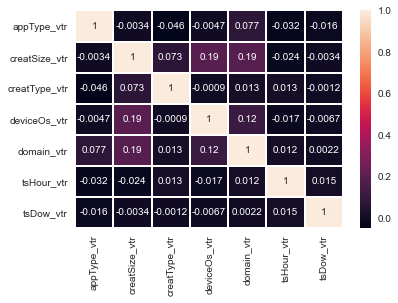

In [134]:
#to get a more visual result , a correlation heatmap is displayed
sns.heatmap(X.corr(),annot=True,lw=1)

### Applying the regression model


Having applied the regression model, in particolar the ordinary least squares regression, it's possible to see from the R-squared, that the independent variables collectively explain a quite good percentage of the variance in the dependent variable. 

R-squared measures the strength of the relationship between the model and the dependent variable on a convenient 0 – 100% scale.
So in this case a value of 79% can be considered a good value.


In [135]:
#Defining train and test sets for the model
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=1)
#Applying the ordinary least squares regression
model = linear_model.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    VTR   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     5534.
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        00:48:19   Log-Likelihood:                -3239.6
No. Observations:               10000   AIC:                             6493.
Df Residuals:                    9993   BIC:                             6544.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
appType_vtr       0.6822      0.150      4.545      0.000       0.388       0.976
creatSize_vtr     0.4680      0.041     11.394      0.000       0.387       0.548
creatType_vtr     0.0950      0.430      0.221      0.825      -0.747       0.937
deviceOs_vtr     -0.2051      0.114     -1.802      0.072      -0.428       0.018
domain_vtr        0.8203      0.017     49.317      0.000       0.788       0.853
tsHour_vtr        0.3212      0.178      1.803      0.071      -0.028       0.670
tsDow_vtr        -1.2264      0.435     -2.818      0.005      -2.079      -0.373
==============================================================================
Omnibus:                      562.281   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              660.121
Skew:                          -0.624   Prob(JB):                    4.53e-144
Kurtosis:                       3.165   Cond. No.                         318.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
#applying the model on the test set
dftest = pd.read_csv("df_test_predict.csv")
#Dropping the columns that are not considered for the analysis
dftest.drop(columns=['tsHour','tsHour_video_start', 'tsHour_video_complete','appType_video_start','appType_video_complete','domain_video_start',
         'domain_video_complete','tsDow_video_start','tsDow_video_complete','creatSize_video_start','creatSize_video_complete',
        'creatType_video_start','creatType_video_complete','deviceOs_video_start',
 'deviceOs_video_complete','Unnamed: 0','appType','creatType','deviceOs','domain','creatSize','tsDow'], axis=1 , inplace= True)
# prediction based on OLS method
OLS_pred = np.exp(model.predict(X_test)) 

final_pred = OLS_pred
#creating a dataframe to store the predicted values
output=pd.DataFrame()
output['VTR']=final_pred
#saving the values to a .csv file
output.to_csv('VTR.csv', index=False)